### Mini Project 1- Dr. Semmelweis and the Discovery of Handwashing

##### Project Description
In 1847, the Hungarian physician Ignaz Semmelweis makes a breakthough discovery: He discovers handwashing. Contaminated hands was a major cause of childbed fever and by enforcing handwashing at his hospital he saved hundreds of lives.
In this python project we will reanalyze the medical data Semmelweis collected. This project assumes that you are familiar with python and pandas DataFrames. You can learn the required skills in these courses:

### Importing Libraries

In [60]:
# Basic
import pandas as pd
%matplotlib inline

### Task 1: Data Loading

In [61]:
# Data Reading
yearly=pd.read_csv(r"C:/Users/Hemant/Desktop/datasets/yearly_deaths_by_clinic.csv")
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


### Task 2 :The alarming number of deaths

- Calculate the yearly proportion of deaths.

In [62]:
# Calculating proportion of deaths
yearly["proportion_deaths"]=yearly['deaths']/yearly['births']
print(yearly)

    year  births  deaths    clinic  proportion_deaths
0   1841    3036     237  clinic 1           0.078063
1   1842    3287     518  clinic 1           0.157591
2   1843    3060     274  clinic 1           0.089542
3   1844    3157     260  clinic 1           0.082357
4   1845    3492     241  clinic 1           0.069015
5   1846    4010     459  clinic 1           0.114464
6   1841    2442      86  clinic 2           0.035217
7   1842    2659     202  clinic 2           0.075968
8   1843    2739     164  clinic 2           0.059876
9   1844    2956      68  clinic 2           0.023004
10  1845    3241      66  clinic 2           0.020364
11  1846    3754     105  clinic 2           0.027970


In [63]:
#Extract the rows from clinic 1 into yearly1 and the rows from clinic 2 into yearly2.
yearly1=yearly[yearly['clinic']=='clinic 1']
yearly2=yearly[yearly['clinic']=='clinic 2']

In [64]:
# Print out yearly1
print(yearly1)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464


### Task 3:Death at the clinics

- Plot the yearly proportion of deaths for both clinics.

Text(0, 0.5, 'Proportion deaths')

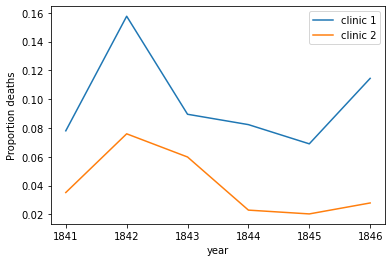

In [65]:
# Plot proportion_deaths by year for the two clinics in a single plot. Use the DataFrame plot method.
# Label the plotted lines using the label argument to plot.
# Save the Axes object returned by the plot method into the variable ax.
ax = yearly1.plot(x="year", y="proportion_deaths",
              label="clinic 1")
yearly2.plot(x="year", y="proportion_deaths",
         label="clinic 2", ax=ax)

# Change the y-axis label to "Proportion deaths".
ax.set_ylabel("Proportion deaths")

### Task 4: The handwashing begins

- Load in the dataset with the monthly number of deaths for Clinic 1.

In [66]:
# Read in datasets/monthly_deaths.csv and assign it to the variable monthly. Make sure to tell read_csv to parse the date 
# column as a date.
monthly=pd.read_csv(r"C:/Users/Hemant/Desktop/datasets/monthly_deaths.csv",parse_dates=["date"])

In [67]:
# Calculate the proportion of deaths per number of births and store the result in the new column monthly["proportion_deaths"].
# Print out the first rows in monthly using the head() method.

monthly["proportion_deaths"]=monthly['deaths']/monthly['births']
print(monthly.head())

        date  births  deaths  proportion_deaths
0 1841-01-01     254      37           0.145669
1 1841-02-01     239      18           0.075314
2 1841-03-01     277      12           0.043321
3 1841-04-01     255       4           0.015686
4 1841-05-01     255       2           0.007843


### Task5: The effect of handwashing

Text(0, 0.5, 'Proportion_deaths')

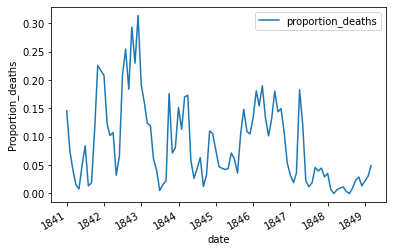

In [68]:
# Plot the monthly proportion of deaths for Clinic 1.
ax= monthly.plot(x="date", y="proportion_deaths")
ax.set_ylabel('Proportion_deaths')

### Task 6 :The effect of handwashing highlighted

- Make a plot that highlights the effect of handwashing.

In [69]:
# Split monthly into before_washing (the rows in monthly before handwashing_start) and after_washing 
# (the rows in monthly at and after handwashing_start).

handwashing_start=pd.to_datetime('1847-06-01')

before_washing=monthly[monthly['date']< handwashing_start]
after_washing=monthly[monthly['date']>= handwashing_start]

Text(0, 0.5, 'Proportion deaths')

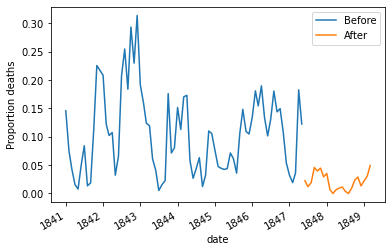

In [70]:
# Plot proportion_deaths in before_washing and after_washing into the same plot. Use the DataFrame plot method.
# Label the plotted lines using the label argument to plot.
# Save the Axes object returned by the plot method into the variable ax.
# Change the y-axis label to "Proportion deaths".

ax= before_washing.plot(x="date", y="proportion_deaths", label="Before")
after_washing.plot(x="date", y="proportion_deaths", label="After", ax=ax)

ax.set_ylabel("Proportion deaths")

### Task 7: More handwashing, fewer deaths?

-Calculate the average reduction in proportion of deaths due to handwashing.

In [71]:
# Select the column proportion_deaths in before_washing and put it into before_proportion.
before_proportion=before_washing.proportion_deaths

# Do the same for proportion_deaths in after_washing and put it into after_proportion.
after_proportion=after_washing.proportion_deaths

In [72]:
# Calculate the difference in mean monthly proportion of deaths as mean after_proportion minus mean before_proportion.
mean_difference= after_proportion.mean()-before_proportion.mean()
print(mean_difference)

-0.0839566075118334


- As per above there is 8% reduction in proportion of death.

### Task 8: A Bootstrap analysis of Semmelweis hand washing data

-Make a bootstrap analysis of the difference in mean monthly proportion of deaths.

In [73]:
# boot_before and boot_after should be sampled with replacement from before_proportion and after_proportion.
# Append 3000 bootstrapped differences in means to boot_mean_diff.

boot_mean_diff=[]

for i in range(3000):
    boot_before=before_proportion.sample(frac=1, replace=True)
    boot_after=after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())
    
# Calculate a 95% confidence_interval as the 2.5% and 97.5% quantiles of boot_mean_diff.

confidence_interval=pd.Series(boot_mean_diff).quantile([0.025,0.975])
confidence_interval

0.025   -0.100945
0.975   -0.067601
dtype: float64

### Task 9: The fate of Dr. Semmelweis
-Given the data Semmelweis collected, is it True or False that doctors should wash their hands?

- According to 95% confidence interval, handwashing reduced the proportion of deaths by between 6.7 and 10% points. Its looks like that Dr. Semmelweis has solid evidence that handwashing was a simple but highly effective procedure that could save many life.

-  As per this available data and Dr. Semmelweis, Doctor_should_wash_their_hands.